# BADSS Workshop 3
Presented by Data Science Society at Berkeley

## Data Visualization, Modeling, & Inferences

Saturday, March 16, 2019

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

We will be looking at the same `country` dataset from the World Development Indicator. Run the cell below to load the data.

In [2]:
data = pd.read_csv("Country.csv")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
data.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,1980,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1968 System of National Accou...,NaN,2011,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,NaN,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,2011 (household consumption only).,NaN,NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


## `matplotlib` Example

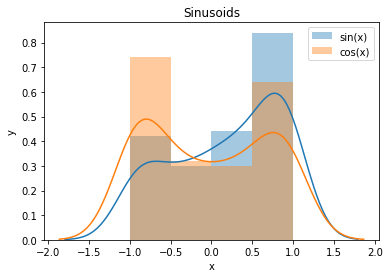

In [3]:
x = np.arange(0, 10, 0.1)

sns.distplot(np.sin(x))
sns.distplot(np.cos(x))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sinusoids')
plt.legend(('sin(x)', 'cos(x)'));

## Continuous Data

#### Histogram 1: Latest Industrial Data

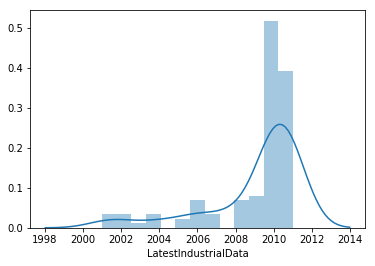

In [4]:
latest_indust = data.dropna(axis=0, subset= ["LatestIndustrialData"])
sns.distplot(latest_indust['LatestIndustrialData']);

#### Histogram 1: Latest Industrial Data (Rug plot)

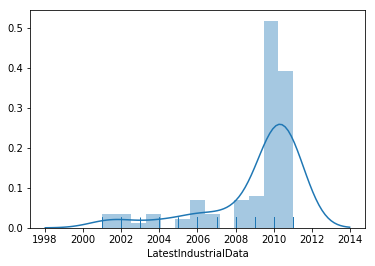

In [5]:
sns.distplot(latest_indust['LatestIndustrialData'], kde = True, rug = True);

#### Boxplot

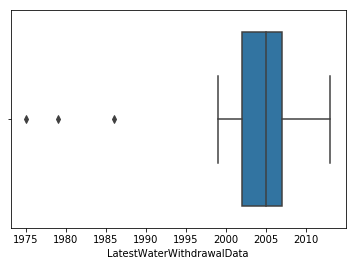

In [6]:
d = latest_indust.dropna(axis=0, subset=["LatestWaterWithdrawalData"])
sns.boxplot(x="LatestWaterWithdrawalData", data = d);

In [7]:
lower, upper = np.percentile(d["LatestWaterWithdrawalData"], [25, 75])
iqr = upper - lower
iqr

5.0

In [8]:
upper_cutoff = upper + 1.5 * iqr
lower_cutoff = lower - 1.5 * iqr
upper_cutoff, lower_cutoff

(2014.5, 1994.5)

#### Scatter Plot (with regression line)

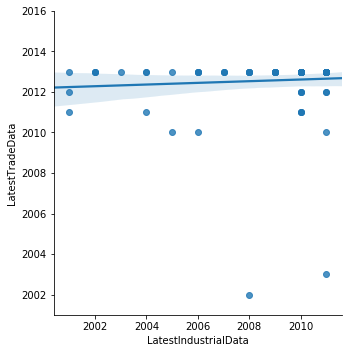

In [9]:
scatter_plot = sns.lmplot(x="LatestIndustrialData", y="LatestTradeData", data=data)
plt.ylim(2001, 2016);

#### Scatter Plot (without regression line)

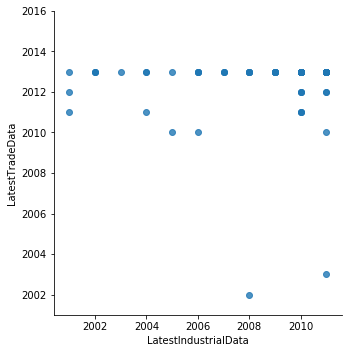

In [10]:
s_plot = sns.lmplot(x="LatestIndustrialData", y="LatestTradeData", data=data, fit_reg = False)
plt.ylim(2001, 2016);

#### Scatter Plot with a third variable (hue)

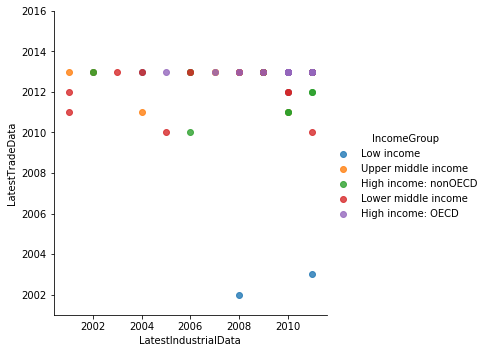

In [11]:
s_plot = sns.lmplot(x="LatestIndustrialData", y="LatestTradeData", data=data, hue= "IncomeGroup", fit_reg = False)
plt.ylim(2001, 2016);

### Exercise 1: Continuous Plot

Plot an overlay histogram showing the distribution of the `LastestIndustrialData` and `LatestWaterWithdrawalData` between 1997 and 2014. Your final plot should look like this:

<img src="plot1.png" />

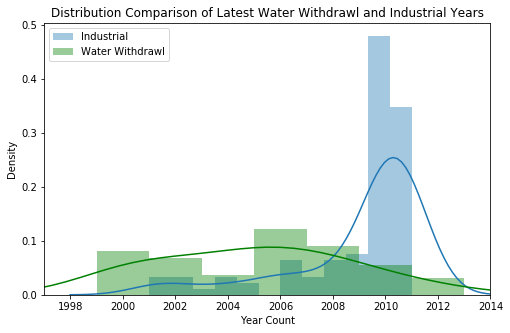

In [12]:
plt.figure(figsize=(8,5))
sns.distplot(d.LatestIndustrialData, kde= True)
sns.distplot(d.LatestWaterWithdrawalData, kde=True, color="green")
plt.ylabel("Density")
plt.title("Distribution Comparison of Latest Water Withdrawl and Industrial Years")
plt.xlabel("Year Count")
plt.legend(('Industrial','Water Withdrawl'))
plt.xlim(1997, 2014);

# Discrete Data

#### Bar Chart

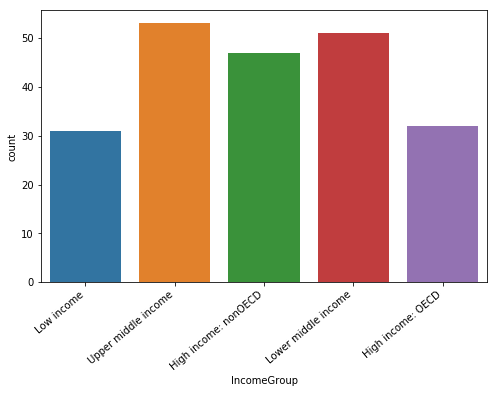

In [13]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='IncomeGroup', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

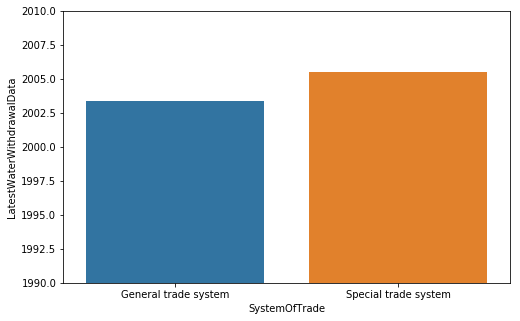

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(x='SystemOfTrade', y='LatestWaterWithdrawalData', data=d, ci=False)
plt.ylim(1990, 2010);

#### Dot Chat

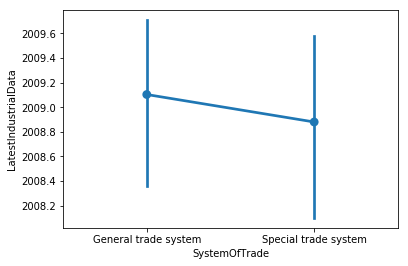

In [15]:
sns.pointplot(x='SystemOfTrade', y='LatestIndustrialData', data=d);

### Exercise 2: Discrete Plot

Plot a barplot comparing `LatestIndustrialData` and `IncomeGroup`, segmented by `SystemOfTrade`, between 1990 and 2015. Your final plot should look like this:

<img src="plot2.png" />

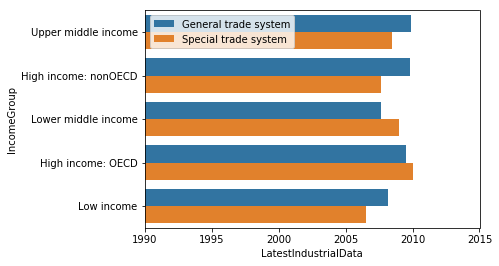

In [16]:
sns.barplot(x='LatestIndustrialData',y='IncomeGroup', hue= "SystemOfTrade", data=d, ci=False);
plt.legend(loc='best')
plt.xlim(1990, 2015);

# Linear Regression

Run this cell to install `scikit-learn` if you don't have that on your machine.

In [17]:
!pip install scikit-learn

We will be exploring with a related dataset (the actual important one) for the World Development Indicator. Each of the 3 main variables have a subset of its own to separate male and female statistics. Make sure you are choosing the right variable so that your model makes sense!

In [18]:
# Importing dataset while doing some additional cleaning.
ind = pd.read_csv('ind.csv').dropna().reset_index(drop=True)
ind.head()

,country,exp,exp_f,exp_m,elec,elec_rural,elec_urban,lit,lit_f,lit_m,mort,mort_f,mort_m
0,Arab World,67.826949,69.652107,66.1017,79.53695,65.869055,91.654618,65.948789,55.003181,76.241724,44.100931,40.51585,47.545312
1,Bosnia and Herzegovina,74.260732,76.897000,71.7500,98.50000,92.980650,100.000000,96.663101,94.359947,99.033707,7.900000,7.00000,8.800000
2,Brazil,70.041976,73.991000,66.2810,97.40000,80.400000,100.000000,86.367882,86.500046,86.227982,28.100000,25.10000,31.000000
3,Burundi,51.485488,53.208000,49.8450,3.90000,0.900000,37.281276,59.303619,52.237762,67.306931,93.400000,83.50000,102.900000
4,Cameroon,51.935878,52.991000,50.9310,46.20000,10.950600,88.350363,68.409157,58.721760,79.194527,91.900000,83.60000,99.800000


Explore relationship among life expectancy, access to electricity, and adult literacy. We are only looking at a very small portion of the data of the World Development Indicators from 2000. 

Our demo will be looking at the relationship between access to electricity and life expectancy. We will be using a module callel `linear_model` in the `scikit-learn` package.

In [19]:
from sklearn.linear_model import LinearRegression

# We need a DataFrame instead of a Series for x and y.
x = ind[['elec']]  
y = ind[['exp']]

exp_v_elec = LinearRegression()
exp_v_elec.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

We can look at the coefficient (slope) and intercept of the linear model to interpret our model. Remember our simple linear regression formula:

$$ y = a + bx + \epsilon $$

In [20]:
print("intercept:    ", exp_v_elec.intercept_[0])
print("coefficient:  ", exp_v_elec.coef_[0][0])

intercept:     47.52843019313574
coefficient:   0.2471405919788669


***Question to Ponder:*** What does the model tell you?

We can also standardize units in our linear model `exp_v_elec` to see our correlation coefficient `r`. Recall that standardizing unit can be done by this formula:

$$ z = \frac{x-\mu}{\sigma}, $$

where $z$ is the standardized unit, $\mu$ the mean, and $\sigma$ the standard deviation. Instead of doing this by hand, we will be using `StandardScaler` in the `preprocessing` module of the `scikit-learn` package.

In [21]:
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler()
scalerX.fit(x)
x_std = scalerX.transform(x)

scalerY = StandardScaler()
scalerY.fit(y)
y_std = scalerY.transform(y)

In [22]:
exp_v_elec_std = LinearRegression()
exp_v_elec_std.fit(x_std, y_std)
print("correlation coefficient (r):  ", exp_v_elec_std.coef_[0][0])

correlation coefficient (r):   0.8929009406791039


The convention to understand the strength of correlation is that for $|r| > 0.7$, the correlation is strong, and for $|r| < 0.3$, the correlation is weak. Anything in between is moderate.

To see what a strong correlation is visually, we can plot a scatter plot with a regression line for `elec` and `exp`, using `lmplot` in seaborn.

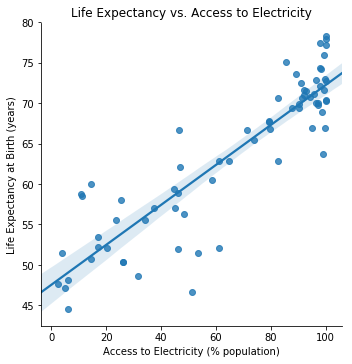

In [23]:
sns.lmplot('elec', 'exp', data=ind)
plt.title('Life Expectancy vs. Access to Electricity')
plt.xlabel('Access to Electricity (% population)')
plt.ylabel('Life Expectancy at Birth (years)');

***Question to Ponder:*** Are you convinced that the correlation between these 2 variables is this strong? Is there something from the dataset that may be misleading?

### Linear Model Exercise

Choose 2 variables from the indicator (`ind`) dataset of your choice, and build a linear model. Report the coefficient (slope), intercept, and the correlation coefficient (standardized slope) for your linear model. At the end, generate a plot that shows the regression line for your model. 

Use the code above to help you get started. 